In [78]:
import numpy as np
from scipy.special import gammaln, binom, gamma
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def alpha(n):
    r = np.arange(n+1)
    vec_n = r[:,None,None]
    vec_j = r[None,:,None]
    vec_k = r[None,None,:]
    ln_alpha = np.log(2*vec_j - 1) + np.log(vec_n) + 2*gammaln(vec_n) \
                + gammaln(vec_k + vec_j - 1) - gammaln(vec_j - vec_k + 1) \
                - np.log(vec_k) - 2*gammaln(vec_k) - gammaln(vec_n - vec_j + 1) \
                - gammaln(vec_n + vec_j)
    alpha = np.exp(ln_alpha)
    alpha[np.isnan(alpha)] = 0
    return alpha

/Users/dpr/miniconda3/envs/mmc_py35/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  
/Users/dpr/miniconda3/envs/mmc_py35/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/Users/dpr/miniconda3/envs/mmc_py35/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in add
  
/Users/dpr/miniconda3/envs/mmc_py35/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in subtract
  
/Users/dpr/miniconda3/envs/mmc_py35/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/dpr/miniconda3/envs/mmc_py35/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


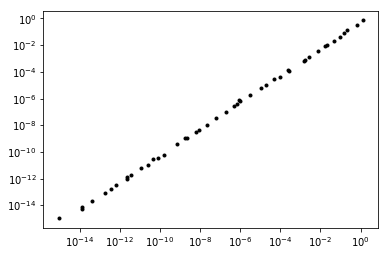

In [130]:
for n in range(4,50):
    alpha_jk = alpha(n)[n]
    J = np.arange(n+1)
    signs_jk = (-1)**(J[:,None] + J[None,:])
    # Sum should be zero except for k=n
    e1 = np.max(np.abs(np.sum(alpha_jk*signs_jk, axis=0)[2:-1]))
    # Relative error in standard Kingman coalescent times
    e2 = np.max(np.abs((np.nansum(alpha_jk * signs_jk / binom(J,2)[:,None], axis=0)[2:] * binom(J[2:],2) - 1)))
    plt.loglog(e1, e2, '.k')

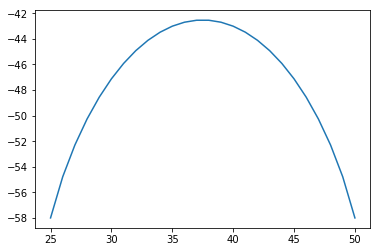

In [140]:
n = 50
k = 25
j = np.arange(k,n+1)
plt.plot(j, -gammaln(j-k+1) -gammaln(n-j+1))

# MPF

In [208]:
import mpmath

In [248]:
def alpha_mp(n,j,k):
    if n < 2 or k < 2or j < k or k > n or j > n:
        return mpmath.mpf(0)
    else:
        ln_alpha = mpmath.log(2*j - 1) + mpmath.log(n) + 2*mpmath.loggamma(n) \
                + mpmath.loggamma(k + j - 1) - mpmath.loggamma(j - k + 1) \
                - mpmath.log(k) - 2*mpmath.loggamma(k) - mpmath.loggamma(n - j + 1) \
                - mpmath.loggamma(n + j)
        return mpmath.exp(ln_alpha)

15


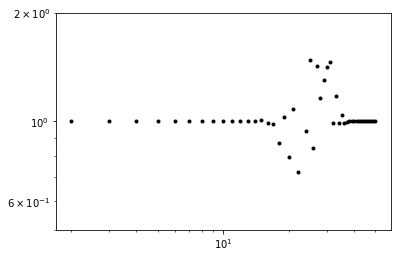

17


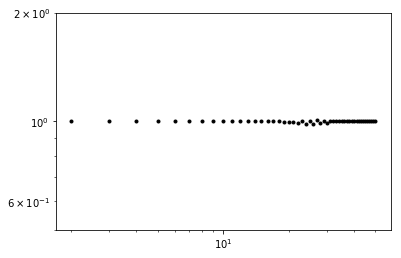

/Users/dpr/miniconda3/envs/mmc_py35/lib/python3.5/site-packages/matplotlib/axes/_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


19


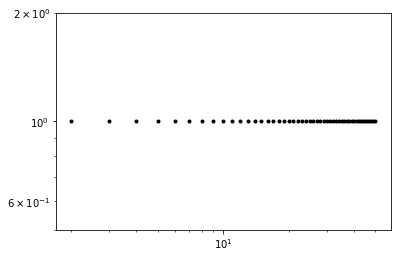

21


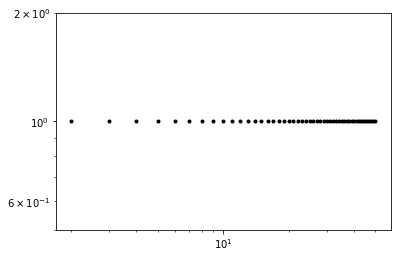

23


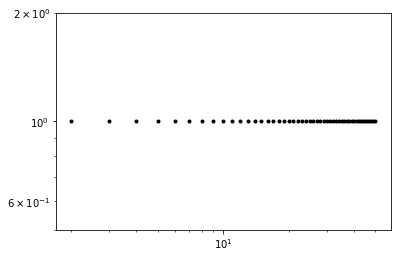

In [310]:
for dps in range(15, 25, 2):
    mpmath.mp.dps = dps
    n = 50
    for k in range(2,n+1):
        s = 0
        for j in range(k,n+1):
            s += (-1)**(j+k) * alpha_mp(n,j,k) / mpmath.binomial(j,2)
        plt.loglog(k, s * mpmath.binomial(k,2), '.k')
    plt.ylim([.5,2])
    print(dps)
    plt.show()

15


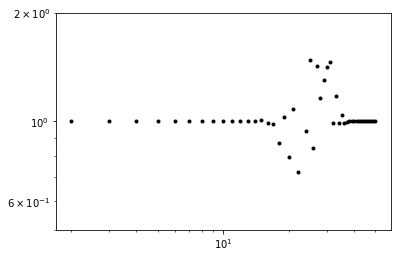

17


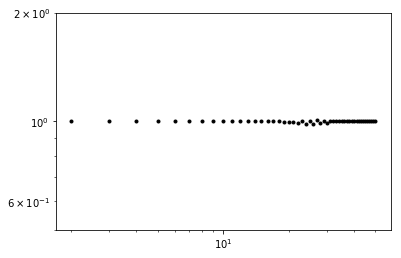

/Users/dpr/miniconda3/envs/mmc_py35/lib/python3.5/site-packages/matplotlib/axes/_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


19


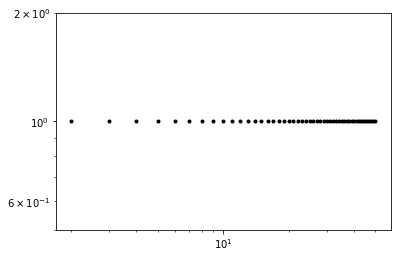

21


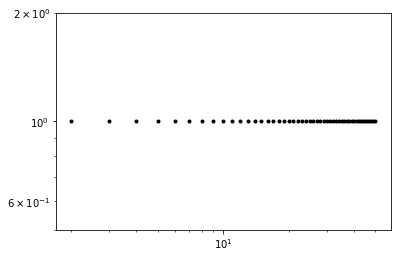

23


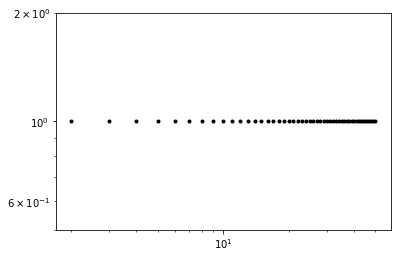

In [311]:
for dps in range(15, 25, 2):
    mpmath.mp.dps = dps
    n = 50
    for k in range(2,n+1):
        s = 0
        for j in range(k,n+1):
            s += (-1)**(j+k) * alpha_mp(n,j,k) / binom(j,2)
        plt.loglog(k, s * binom(k,2), '.k')
    plt.ylim([.5,2])
    print(dps)
    plt.show()

In [153]:
-1 * mpmath.mpf(4)

mpf('-4.0')

In [160]:
1/binom(25,2)

0.0033333333333333335

In [161]:
mpmath.mpf(1) * np.arange(10)

array([mpf('0.0'), mpf('1.0'), mpf('2.0'), mpf('3.0'), mpf('4.0'),
       mpf('5.0'), mpf('6.0'), mpf('7.0'), mpf('8.0'), mpf('9.0')], dtype=object)

In [215]:
mpmath.mpf(np.arange(10))

TypeError: cannot create mpf from array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [219]:
np.fromfunction(mpmath.mpf, (10))

TypeError: 'int' object is not iterable

In [229]:
np.frompyfunction(mpmath.loggamma, (4,), dtype=int)

TypeError: cannot create mpf from array([0, 1, 2, 3])

In [231]:
besseli_vec = np.frompyfunc(mpmath.besseli, 2, 1)

In [237]:
besseli_vec

<ufunc '? (vectorized)'>

In [238]:
my_log = np.frompyfunc(mpmath.log, 1, 1)

In [239]:
my_log(np.arange(10))

array([mpf('-inf'), mpf('0.0'),
       mpf('0.69314718055994530941723212145817656807549'),
       mpf('1.0986122886681096913952452369225257046468'),
       mpf('1.386294361119890618834464242916353136151'),
       mpf('1.6094379124341003746007593332261876395262'),
       mpf('1.791759469228055000812477358380702272723'),
       mpf('1.9459101490553133051053527434431797296377'),
       mpf('2.0794415416798359282516963643745297042272'),
       mpf('2.1972245773362193827904904738450514092936')], dtype=object)

In [240]:
np.log(np.arange(10))

/Users/dpr/miniconda3/envs/mmc_py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([       -inf,  0.        ,  0.69314718,  1.09861229,  1.38629436,
        1.60943791,  1.79175947,  1.94591015,  2.07944154,  2.19722458])

In [249]:
alpha_vec = np.frompyfunc(alpha_mp, 3, 1)

In [268]:
mpmath.mp.dps = 25
n = 50
a = np.fromfunction(alpha_vec, (n+1, n+1, n+1))[n]
signs = np.fromfunction(lambda x, y: (-1)**(x+y), (n+1, n+1))
np.sum(a[2:] * signs[2:] / binom(np.arange(2,n+1), 2)[:,None], axis=0)[2:] * binom(np.arange(2,n+1), 2) - 1

array([mpf('-6.966411721345029949307645079e-24'),
       mpf('6.204113088089130382683962506e-22'),
       mpf('2.169082116085419505066003362e-20'),
       mpf('1.193421032615474825628286426e-19'),
       mpf('1.522530555751335393601698931e-18'),
       mpf('1.380350693710840658552771367e-18'),
       mpf('7.208235763301708424935482613e-17'),
       mpf('2.042857146344394848349029087e-17'),
       mpf('1.44173827510926507379629939e-15'),
       mpf('-3.251746395345417630355914547e-15'),
       mpf('1.504540047418753815483380323e-15'),
       mpf('1.722800780402859754092020396e-14'),
       mpf('-1.32426838251270094428079712e-13'),
       mpf('5.623336643721506323105878596e-13'),
       mpf('5.192228017230098283543715193e-13'),
       mpf('4.674952014890269583444986372e-12'),
       mpf('-1.467449982891057553460256774e-11'),
       mpf('1.740113944959536286580717029e-11'),
       mpf('-3.484800803703167555977645384e-11'),
       mpf('7.374953544819465791598933968e-11'),
       mpf('-7.81

In [270]:
np.finfo(np.float128)

finfo(resolution=1e-18, min=-1.18973149536e+4932, max=1.18973149536e+4932, dtype=float128)

In [271]:
np.float128(34.34)

34.340000000000003411

In [277]:
np.log(np.float128(34.34)).dtype

dtype('float128')

In [273]:
gammaln(np.float128(34))

TypeError: ufunc '_gammaln' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [274]:
?gammaln

In [278]:
gamma(np.float128(34))

TypeError: ufunc 'gamma' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [284]:
mpmath.mp.dps = 26
np.array(map(mpmath.mpf, range(10))).dtype.itemsize

8

In [294]:
np.arange(10, dtype="int").dtype.itemsize

8

In [300]:
A = mpmath.matrix(3)
A

matrix(
[['0.0', '0.0', '0.0'],
 ['0.0', '0.0', '0.0'],
 ['0.0', '0.0', '0.0']])

In [308]:
np.array(A.tolist(), dtype=float).dtype

dtype('float64')

In [305]:
A.tolist()

[[mpf('0.0'), mpf('0.0'), mpf('0.0')],
 [mpf('0.0'), mpf('0.0'), mpf('0.0')],
 [mpf('0.0'), mpf('0.0'), mpf('0.0')]]

In [313]:
from numpy.polynomial.laguerre import laggauss

In [317]:
laggauss(10)[1]

array([  3.08441116e-01,   4.01119929e-01,   2.18068288e-01,
         6.20874561e-02,   9.50151698e-03,   7.53008389e-04,
         2.82592335e-05,   4.24931398e-07,   1.83956482e-09,
         9.91182722e-13])